<a href="https://colab.research.google.com/github/Evgenius87/Data_Science_hw/blob/main/Hw_10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Частина 2
В цій частині ми знову будемо працювати з датасетом fasion_mnist.

На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.

Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.

Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras import layers, models
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras import regularizers
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.applications.vgg16 import VGG16

завантажуємо та нормалізуємо дані

In [9]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [10]:
train_img_vgg = np.repeat(train_images, 3, axis=3)
train_img_vgg = tf.image.resize(train_img_vgg, [48, 48])
test_img_vgg = np.repeat(test_images, 3, axis=3)
test_img_vgg = tf.image.resize(test_img_vgg, [48, 48])

створюємо архітектуру нейронної мережі

In [12]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
conv_base.trainable = False

early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, verbose=1, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)
callbacks = [lr_scheduler, early_stopping]

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))



In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_4 (Flatten)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
history = model.fit(train_img_vgg, train_labels,
                            epochs=30,
                            batch_size=128,
                            validation_data=(test_img_vgg, test_labels),
                            callbacks=callbacks)



Epoch 1/30
469/469 [==============================] - 18s 37ms/step - loss: 0.6128 - accuracy: 0.7858 - val_loss: 0.4351 - val_accuracy: 0.8435 - lr: 0.0010
Epoch 2/30
469/469 [==============================] - 17s 36ms/step - loss: 0.4267 - accuracy: 0.8458 - val_loss: 0.4046 - val_accuracy: 0.8547 - lr: 0.0010
Epoch 3/30
469/469 [==============================] - 17s 36ms/step - loss: 0.3882 - accuracy: 0.8587 - val_loss: 0.3800 - val_accuracy: 0.8631 - lr: 0.0010
Epoch 4/30
469/469 [==============================] - 17s 36ms/step - loss: 0.3670 - accuracy: 0.8665 - val_loss: 0.3662 - val_accuracy: 0.8672 - lr: 0.0010
Epoch 5/30
469/469 [==============================] - 17s 36ms/step - loss: 0.3494 - accuracy: 0.8716 - val_loss: 0.3598 - val_accuracy: 0.8718 - lr: 0.0010
Epoch 6/30
469/469 [==============================] - 17s 36ms/step - loss: 0.3382 - accuracy: 0.8761 - val_loss: 0.3563 - val_accuracy: 0.8712 - lr: 0.0010
Epoch 7/30
469/469 [==============================] - 17s 

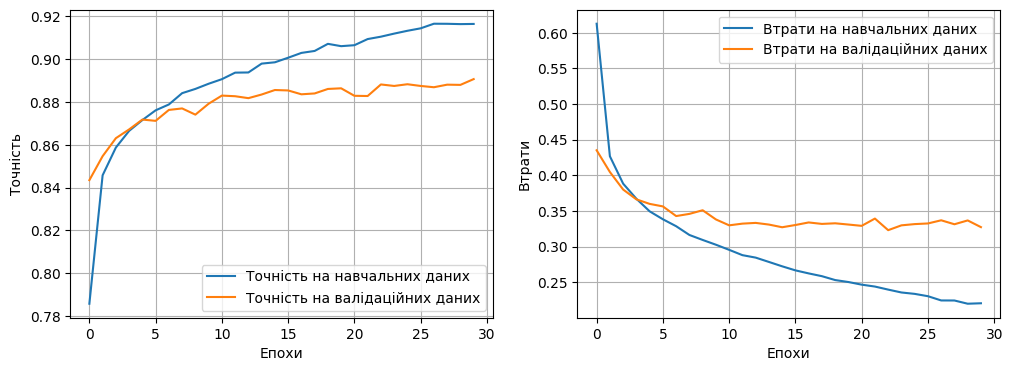

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на навчальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на навчальних даних')
plt.plot(history.history['val_loss'], label='Втрати на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.grid(True)

plt.show()

# Оцінка точності на тестовому наборі даних
# test_loss, test_acc = model.evaluate(test_images, test_labels)
# print(f"Точність на тестовому наборі даних: {test_acc * 100:.2f}%")

донавчання

In [17]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(48, 48, 3))
# conv_base.trainable = True
# set_trainable = False
# for layer in conv_base.layers:
#     if layer.name == "block5_conv1":
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False
for layer in conv_base.layers[:-5]:
    layer.trainable = False

In [18]:
t_model = models.Sequential()
t_model.add(conv_base)
t_model.add(layers.Flatten())
t_model.add(layers.Dense(256, activation='relu'))
t_model.add(layers.Dropout(0.2))
t_model.add(layers.Dense(10, activation='softmax'))



t_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

t_model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 7213322 (27.52 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


In [19]:
history = t_model.fit(train_img_vgg, train_labels,
                            epochs=30,
                            batch_size=128,
                            validation_data=(test_img_vgg, test_labels),
                            callbacks=callbacks)




Epoch 1/30
469/469 [==============================] - 25s 49ms/step - loss: 0.4223 - accuracy: 0.8497 - val_loss: 0.3156 - val_accuracy: 0.8895 - lr: 0.0010
Epoch 2/30
469/469 [==============================] - 23s 48ms/step - loss: 0.2598 - accuracy: 0.9071 - val_loss: 0.2791 - val_accuracy: 0.8977 - lr: 0.0010
Epoch 3/30
469/469 [==============================] - 22s 47ms/step - loss: 0.2232 - accuracy: 0.9208 - val_loss: 0.2600 - val_accuracy: 0.9101 - lr: 0.0010
Epoch 4/30
469/469 [==============================] - 22s 48ms/step - loss: 0.1982 - accuracy: 0.9279 - val_loss: 0.2528 - val_accuracy: 0.9157 - lr: 0.0010
Epoch 5/30
469/469 [==============================] - 22s 48ms/step - loss: 0.1803 - accuracy: 0.9333 - val_loss: 0.2511 - val_accuracy: 0.9116 - lr: 0.0010
Epoch 6/30
469/469 [==============================] - 23s 48ms/step - loss: 0.1690 - accuracy: 0.9386 - val_loss: 0.2384 - val_accuracy: 0.9172 - lr: 0.0010
Epoch 7/30
469/469 [==============================] - 22s 

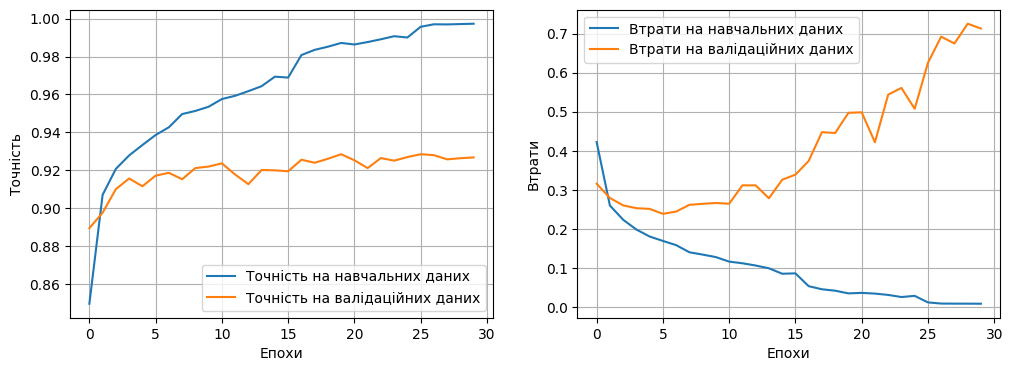

In [20]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на навчальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на навчальних даних')
plt.plot(history.history['val_loss'], label='Втрати на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.grid(True)

plt.show()